# Insurance Claims Data Investigation

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [3]:
df = pd.read_csv("Cleaned_Insurance_Data.csv")

### Exploratory Data Analysis

In [4]:
df.head() # Display top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.shape

(1000, 39)

We can see that the insurance claims dataset consists of 1000 entries as well as 39 features.

Let us have a look at the names and datatypes for each feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that 18 features are of a numerical datatype (17 int and 1 float) while the remaining 21 features consist of text data values. 

We will now investigate the summary statistics for all features of a numerical datatype.

In [8]:
df.describe().T # Transpose results to display feature names more clearly

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.500,276.250,479.00
age,1000.0,3.896300e+01,9.126276e+00,19.00,32.0000,38.000,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.000,759099.750,999435.00
policy_deductable,1000.0,1.134000e+03,6.106692e+02,500.00,500.0000,1000.000,2000.000,2000.00
policy_annual_premium,1000.0,1.257020e+03,2.439092e+02,433.33,1090.5675,1258.415,1415.695,2047.59
umbrella_limit,1000.0,1.103100e+06,2.296444e+06,0.00,0.0000,0.000,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.500,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.000,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.000,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.000,17.000,23.00


**Detecting Null Values**

In [9]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

It seems there is only one feature that contains null values, that feature being `authorities_contacted`.

This is due to the value of "None" being detected as a null value and thus being replaced by "nan" upon reading the dataset into a pandas dataframe.

We can view this feature in closer detail as follows:

In [10]:
df["authorities_contacted"].unique() # Displaying all unique values for the authorities_contacted feature

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

We will replace all "nan" values in this feature with the string "None" as it was a valid option considering the context of the feature. 

In [12]:
df["authorities_contacted"] = df["authorities_contacted"].fillna("None")

In [13]:
df["authorities_contacted"].unique() # Ensure correct replacement of nan values

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [14]:
df["authorities_contacted"].isnull().sum() # Ensure null values have been dealt with

0

**Search for anomalous values**

In [15]:
for col in df.columns:
    
    if "?" in df[col].values:
        print(col)

collision_type
property_damage
police_report_available


The below print statements will display the unique values occuring in the features that were identified above.

In [21]:
print(df["collision_type"].unique())

['Side Collision' '?' 'Rear Collision' 'Front Collision']


In [22]:
print(df["property_damage"].unique())

['YES' '?' 'NO']


In [23]:
print(df["police_report_available"].unique())

['YES' '?' 'NO']


In [24]:
df["collision_type"] = df["collision_type"].replace("?", "Unknown")

In [26]:
print(df["collision_type"].unique()) # Ensuring successful replacement

['Side Collision' 'Unknown' 'Rear Collision' 'Front Collision']


In [27]:
df["property_damage"] = df["property_damage"].replace("?", "Unknown")

In [28]:
df["police_report_available"] = df["police_report_available"].replace("?", "Unknown")

In [29]:
print(df["property_damage"].unique())

['YES' 'Unknown' 'NO']


In [30]:
print(df["police_report_available"].unique())

['YES' 'Unknown' 'NO']


Now that we have cleaned the dataset a bit further, let us take a look at a few key details.

We are interested in the features of the dataset that represent dates. These features include `policy_bind_date` and `incident_date`. However, these features are of the "object" datatype so in order to analyse and visualise them in further detail we will have to convert them to a "datetime" datatype first. This can be seen below:

In [31]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

**Policy Bind Time**

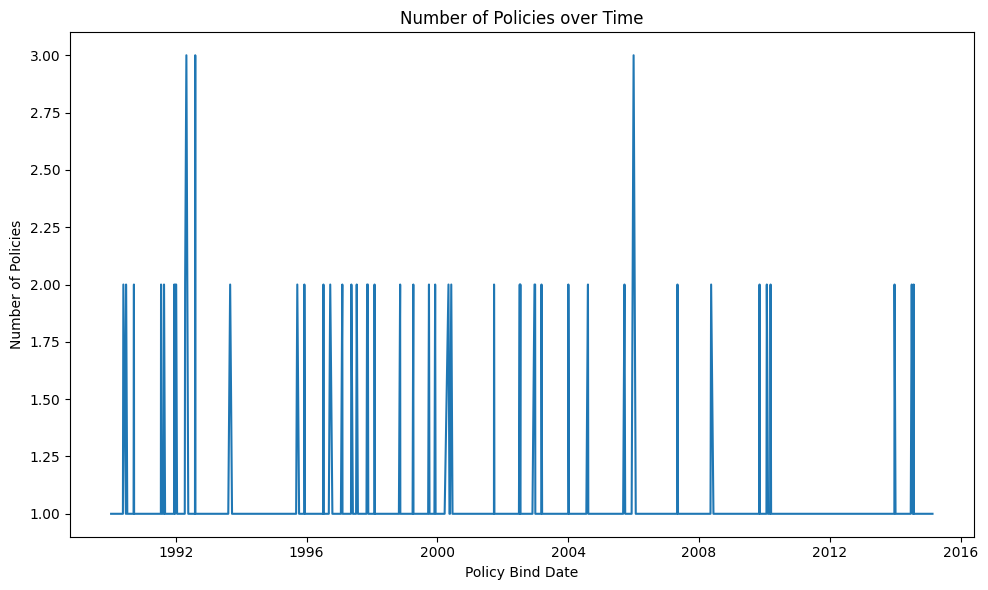

In [32]:
policy_counts = df.groupby('policy_bind_date').size().reset_index(name='policy_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=policy_counts, x='policy_bind_date', y='policy_count')
plt.xlabel('Policy Bind Date')
plt.ylabel('Number of Policies')
plt.title('Number of Policies over Time')
plt.tight_layout()
plt.show()

In [106]:
print(df["policy_bind_date"].min())
print(df["policy_bind_date"].max())

1990-01-08 00:00:00
2015-02-22 00:00:00


From the lineplot and the minimum and maximum above, we can see that the dataset contains entries for policies created over the span of approximately 25 years

**Incident Date**

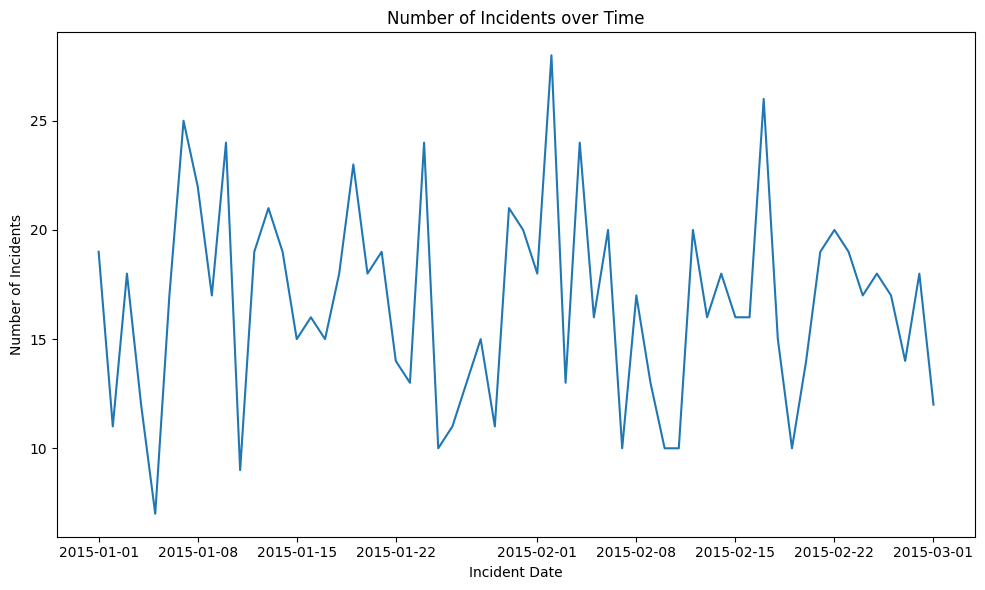

In [33]:
incident_counts = df.groupby('incident_date').size().reset_index(name='incident_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=incident_counts, x='incident_date', y='incident_count')
plt.xlabel('Incident Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents over Time')
plt.tight_layout()
plt.show()

In [34]:
print(df["incident_date"].min())
print(df["incident_date"].max())

2015-01-01 00:00:00
2015-03-01 00:00:00


In [35]:
df["incident_date"].nunique()

60

The dataset only contains entries for the first three months of the year 2015. This gives us a glimpse into the time period that the insurance claims data was extracted from. We can also see that there are only 60 unique dates within the three month period that incidents take place on. 

**Incidents by Hour**

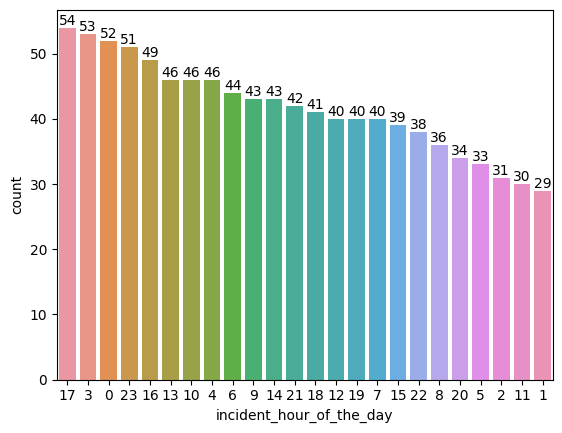

In [36]:
ax = sns.countplot(x=df["incident_hour_of_the_day"], order = df["incident_hour_of_the_day"].value_counts().index)

abs_values = df['incident_hour_of_the_day'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

**Count of Observations**

**Gender of Insured**

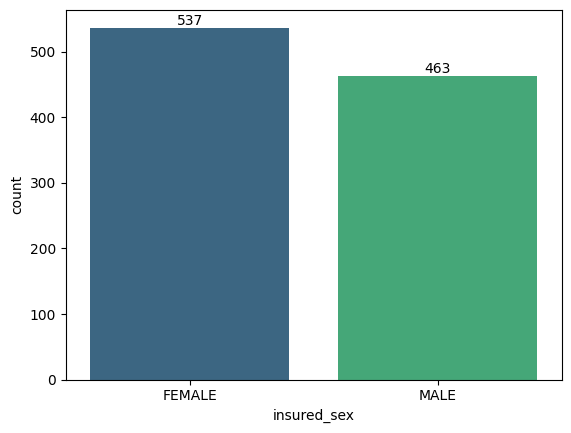

In [39]:
ax = sns.countplot(x=df["insured_sex"], order = df["insured_sex"].value_counts().index, palette="viridis")

abs_values = df['insured_sex'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

**Education Level of Insured**

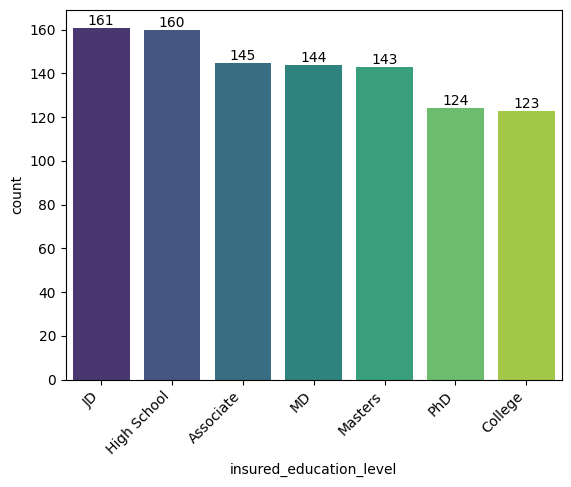

In [41]:
ax = sns.countplot(x=df["insured_education_level"], order=df["insured_education_level"].value_counts().index, palette="viridis")

abs_values = df['insured_education_level'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

**Occupation of Insured**

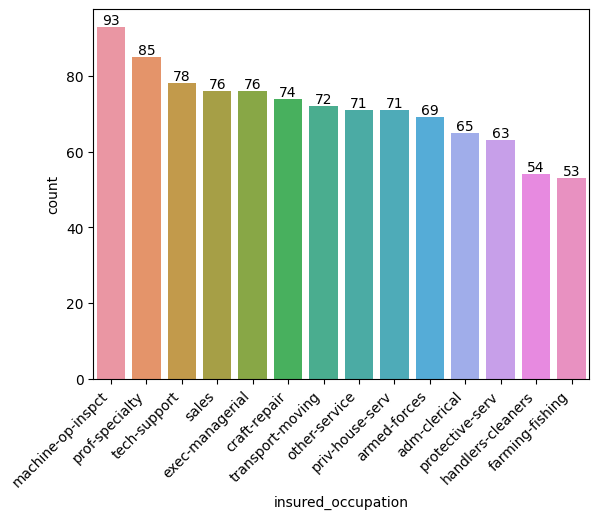

In [42]:
ax = sns.countplot(x=df["insured_occupation"], order=df["insured_occupation"].value_counts().index)

abs_values = df['insured_occupation'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

**Investigating Total Claim Amount**

**Against Age**

In [50]:
df_age_group = df.drop(["policy_bind_date","incident_date"], axis=1).groupby("age").sum().reset_index()

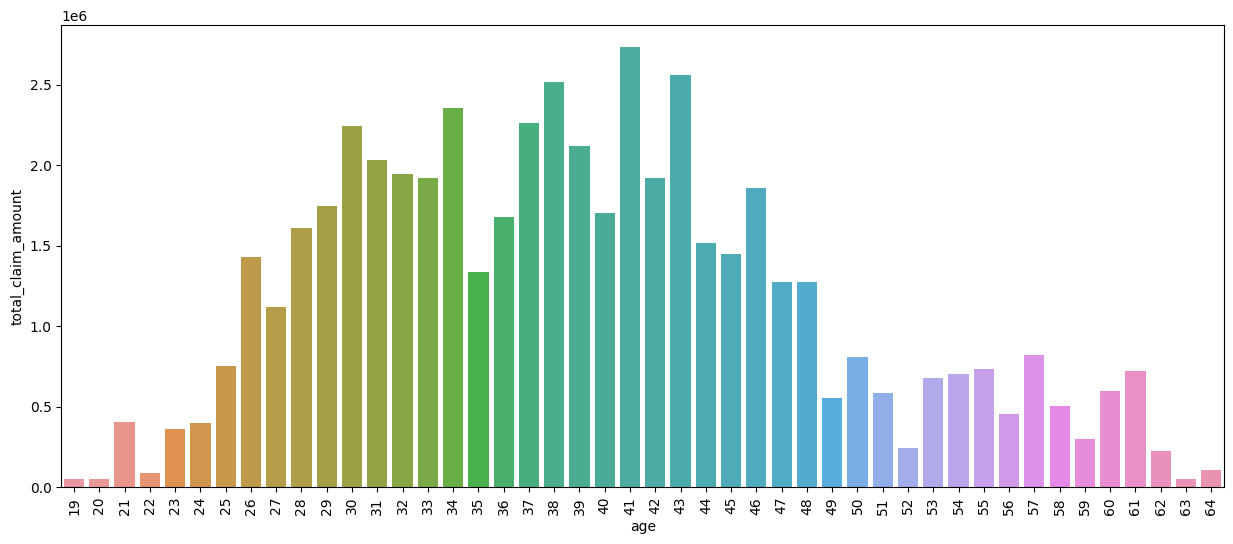

In [61]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_age_group, x="age", y="total_claim_amount", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

**Against Gender**

In [45]:
df_sex_group = df.drop(["policy_bind_date","incident_date"], axis=1).groupby("insured_sex").sum().reset_index()

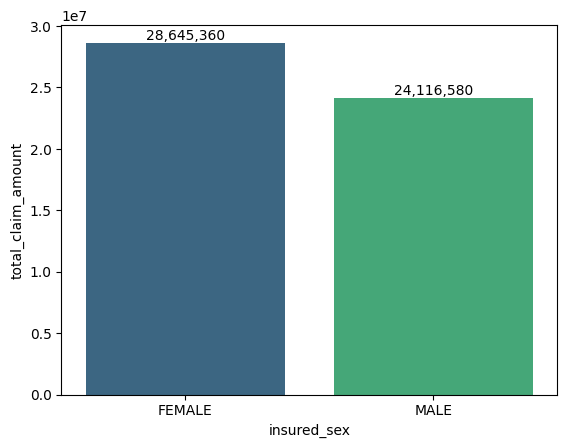

In [48]:
ax = sns.barplot(data=df_sex_group, x="insured_sex", y="total_claim_amount", errorbar=None, palette="viridis")

abs_values = df_sex_group['total_claim_amount'].values

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

**Against Education Level**

In [59]:
df_edu_group = df.drop(["policy_bind_date","incident_date"], axis=1).groupby("insured_education_level").sum().reset_index()

<Axes: xlabel='insured_education_level', ylabel='total_claim_amount'>

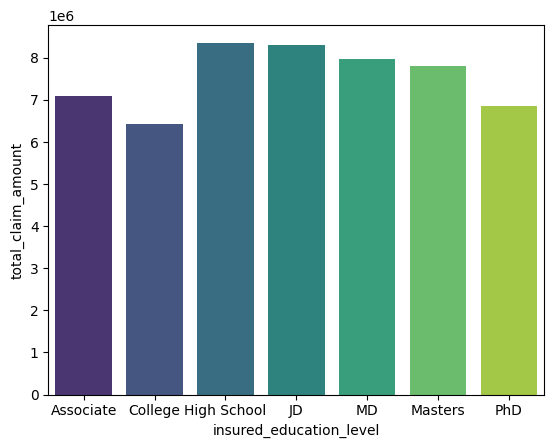

In [60]:
sns.barplot(data=df_edu_group, x="insured_education_level", y="total_claim_amount", errorbar=None, palette="viridis")

### Feature Engineering

In [94]:
df_eng = df.copy()

**Date Features**

In [95]:
df_eng['policy_bind_year'] = df_eng['policy_bind_date'].dt.year
df_eng['policy_bind_month'] = df_eng['policy_bind_date'].dt.month
df_eng['policy_bind_day'] = df_eng['policy_bind_date'].dt.day

In [96]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,2006,6,27


In [97]:
df_eng['incident_year'] = df_eng['incident_date'].dt.year
df_eng['incident_month'] = df_eng['incident_date'].dt.month
df_eng['incident_day'] = df_eng['incident_date'].dt.day

In [98]:
df_eng[['incident_date', 'incident_year', 'incident_month', 'incident_day']].head(2)

,incident_date,incident_year,incident_month,incident_day
0,2015-01-25,2015,1,25
1,2015-01-21,2015,1,21


**Years as Customer**

In [99]:
df_eng["years_as_customer"] = df_eng["months_as_customer"]/12

In [100]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,2014,10,17,2015,1,25,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,2006,6,27,2015,1,21,19.000000


**Age at Customer Join**

In [101]:
df_eng['age_at_customer_join'] =  df_eng['age'] - df_eng['years_as_customer']

In [102]:
df_eng.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,2014,10,17,2015,1,25,27.333333,20.666667
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,2006,6,27,2015,1,21,19.000000,23.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,2000,9,6,2015,2,22,11.166667,17.833333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,1990,5,25,2015,1,10,21.333333,19.666667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,2014,6,6,2015,2,17,19.000000,25.000000


**Customer Category**

In [103]:
def categorise_customer(customer_term):
    if customer_term < 5:
        return 'Short-term Client'
    elif 5 <= customer_term < 15:
        return 'Established Client'
    else:
        return 'Long-term Client'

In [104]:
df_eng['customer_category'] = df_eng['years_as_customer'].apply(categorise_customer)

In [109]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2014,10,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2006,6,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged


**Age Category**

In [106]:
def categorise_age(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age < 60:
        return 'Middle Aged'
    else:
        return 'Elderly'

In [107]:
df_eng['age_category'] = df_eng['age'].apply(categorise_age)

In [108]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2014,10,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2006,6,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged


**Policy Monthly Premium**

In [110]:
df_eng['policy_monthly_premium'] = df_eng['policy_annual_premium']/12

In [111]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,10,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,6,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333


**Total Premiums Paid**

In [112]:
df_eng['total_premiums_paid'] = df_eng['policy_monthly_premium'] * df_eng['months_as_customer']

In [113]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500,38455.54
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333,22747.18


**Net Value of Customer**

In [114]:
df_eng['net_value_of_customer'] = df_eng['total_premiums_paid'] - df_eng['total_claim_amount']

In [115]:
df_eng.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2015,2,22,11.166667,17.833333,Established Client,Young Adult,117.761667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2015,1,10,21.333333,19.666667,Long-term Client,Middle Aged,117.978333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2015,2,17,19.000000,25.000000,Long-term Client,Middle Aged,131.992500,30094.290000,23594.290000


In [116]:
df_eng.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'incident_year',
       'incident_month', 'incident_day', 'years_as_customer',
       'age_at_customer_join', 'c

In [117]:
df_eng.shape

(1000, 52)

In [119]:
df_eng.head(3).T

,0,1,2
months_as_customer,328,228,134
age,48,42,29
policy_number,521585,342868,687698
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00
policy_state,OH,IN,OH
policy_csl,250/500,250/500,100/300
policy_deductable,1000,2000,2000
policy_annual_premium,1406.91,1197.22,1413.14
umbrella_limit,0,5000000,5000000
insured_zip,466132,468176,430632


In [120]:
df_eng.describe().T

,count,mean,min,25%,50%,75%,max,std
months_as_customer,1000.0,203.954,0.0,115.75,199.5,276.25,479.0,115.113174
age,1000.0,38.963,19.0,32.0,38.0,44.0,64.0,9.126276
policy_number,1000.0,546238.648,100804.0,335980.25,533135.0,759099.75,999435.0,257063.005276
policy_bind_date,1000,2002-02-08 04:40:47.999999872,1990-01-08 00:00:00,1995-09-19 00:00:00,2002-04-01 12:00:00,2008-04-21 12:00:00,2015-02-22 00:00:00,NaN
policy_deductable,1000.0,1134.0,500.0,500.0,1000.0,2000.0,2000.0,610.669237
policy_annual_premium,1000.0,1257.02011,433.33,1090.5675,1258.415,1415.695,2047.59,243.9092
umbrella_limit,1000.0,1103100.0,0.0,0.0,0.0,0.0,10000000.0,2296443.782034
insured_zip,1000.0,501214.488,430104.0,448404.5,466445.5,603251.0,620962.0,71701.610941
capital-gains,1000.0,25126.1,0.0,0.0,0.0,51025.0,100500.0,27872.187708
capital-loss,1000.0,-26793.7,-111100.0,-51500.0,-23250.0,0.0,0.0,28104.096686


### Export Engineered Dataset

In [121]:
df_eng.to_csv('Advanced_Features_Insurance_Data.csv')